# DVA256 - Data Management and Datafication

## Exercise 3

The exercise 3 covers the topics of signal processing. It also evaluates the students' understanding of the methods and how the methods can be used to convert raw sigals into valuable information for conducting advanced data analytics.

In [75]:
###################################
#  Import required libries here   #
###################################
import matplotlib.pyplot as plt
import numpy as np
from scipy.io.wavfile import write, read
from scipy.fft import fft, fftfreq, ifft
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from IPython.display import Audio
from scipy.fft import fft
from scipy.signal import welch
from scipy.stats import entropy as en




## Question 1. 
A simple sin wave can be created using the following equation.

$$y(t) = A * sin(2 * pi * f * t)$$

where,

    y(t) is the output signal or simply y-axis sample we want to calculate for x-axis sample t.

    A is the amplitude.

    pi is 3.14159.

    f is the frequency.

    t is number of samples. 

Since we need to convert it to digital, we will divide it by the sampling rate.

<strong>Part A:</strong> Create two signals $y1(t)$ and $y2(t$) for frequency 50 Hz and 120 Hz and respectively. Consider amplitude 10 v for both $y1(t)$ and $y2(t)$. Plot the signals.

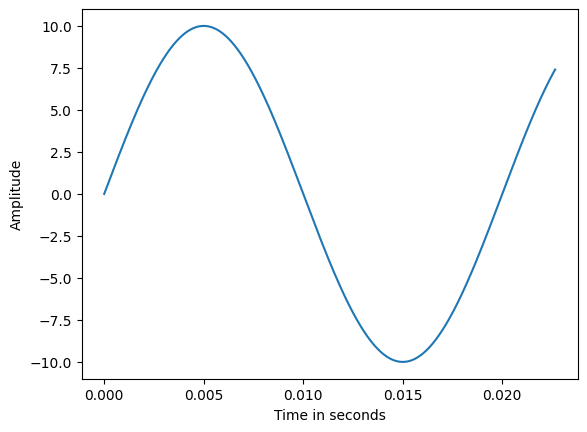

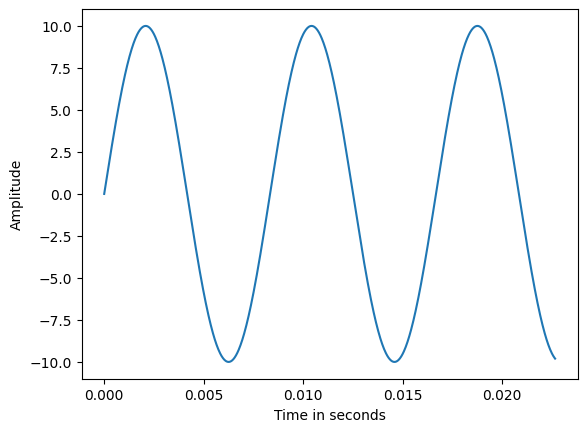

In [66]:
# There are two functions, one for generating the signals and another one to visualize the signals. 
# For part A, you need to complete these two functions

  
def generate_sine_wave(frequency, amplitude, duration, sample_rate):
    samples = np.arange(0, duration, 1/sample_rate)
    signal = amplitude * np.sin(2 * np.pi * frequency * samples)
    return samples, signal 
    


   
def show_signal(samples, signal):
    plt.plot(samples[:1000], signal[:1000])
    plt.xlabel('Time in seconds')
    plt.ylabel('Amplitude')
    plt.show()
    

# Initilize parameters
SAMPLE_RATE = 44100 # Hertz, a scalar value 
DURATION = 2 # You can try with any scalar value
AMPLITUDE = 10 # as mentioned in the question

# Create and plot the first signal y1(t)  
samples, Y1 = generate_sine_wave(50, AMPLITUDE, DURATION, SAMPLE_RATE)
show_signal(samples, Y1)

# Create and plot the second signal y2(t)
samples, Y2 = generate_sine_wave(120, AMPLITUDE, DURATION, SAMPLE_RATE)
show_signal(samples, Y2)


Audio(Y1, rate=SAMPLE_RATE)



<strong>Part B:</strong> Add the above two signals to create a new signal $y(t)$, i.e.,

$$y(t) = y1(t)+y2(t)$$

Plot the new signal $y$

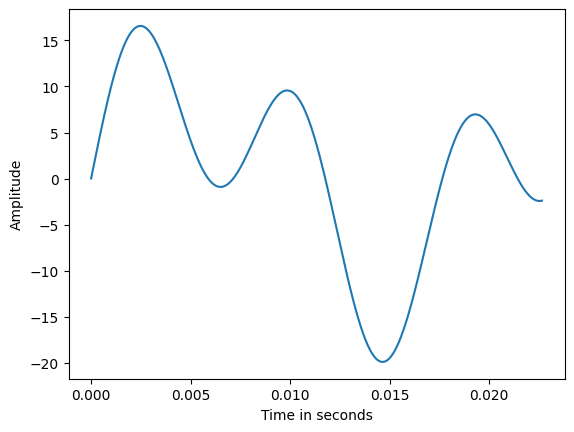

In [67]:
# For PART B complete the following function.
def add_signals(Y1, Y2):
    ###
    #   description:  
    #       this function generates a plot for the given signal.
    #  
    #   input parameters: 
    #       Y1 (array_like): the sine wave signal .
    #       Y2(array_like): samples values (angle), in radians 
    #
    #   Output:
    #       Y (array_like): the new signal 
    ### 

    return Y1 + Y2



# Add Y1 and Y2 and plot the new signal Y
Y = add_signals(Y1, Y2)
show_signal(samples,Y) # We can call the same show_signal method to plot the new signal
Audio(Y, rate=SAMPLE_RATE)

<strong>Part C:</strong> Generate a random noise $n1(t)$ with amplitude 2.5 v and the same length of the signal $y(t)$. Add this noise with $y(t)$ and create a noisy signal $ny(t)$ and save it as an audio signal (.wav).

In [68]:
# For PART C complete the following function.

def add_and_save_noisy_signal(samples, signal, sample_rate, noise_amp):
     ###
    #   description:  
    #       this function generates a noise signal and add it with signal Y.
    #  
    #   input parameters: 
    #       signal (array_like): the sine wave signal .
    #       noise_amp (int)    : amplitude for random noise signal
    #
    ### 
    noise = noise_amp * np.random.randn(len(signal))
    noisy_signal = signal + noise
    norm_factor = np.max(np.abs(noisy_signal))
    noisy_signal = noisy_signal / norm_factor
    write("noisy_signal.wav", sample_rate, noisy_signal.astype(np.float32))
    return noisy_signal

    

# Add noise to signal Y2 and it with the signal Y1. Save the signal
NOISE_AMP = 2.5
noisy_sig = add_and_save_noisy_signal(samples, Y, SAMPLE_RATE, NOISE_AMP)



sample_rate, waveform = read("noisy_signal.wav")
Audio(noisy_sig, rate=sample_rate)



## Question 2.

### Consider noisy signal $ny(t)$ from the previous task and do the following:

(i) Clean the signal $ny(t)$ using FFT and compare the characteristics between clean and noisy signal.

(ii) Save the clean signal as an audio signal and compare it with the noisy signal by listening

POWER SPECTRUMS:


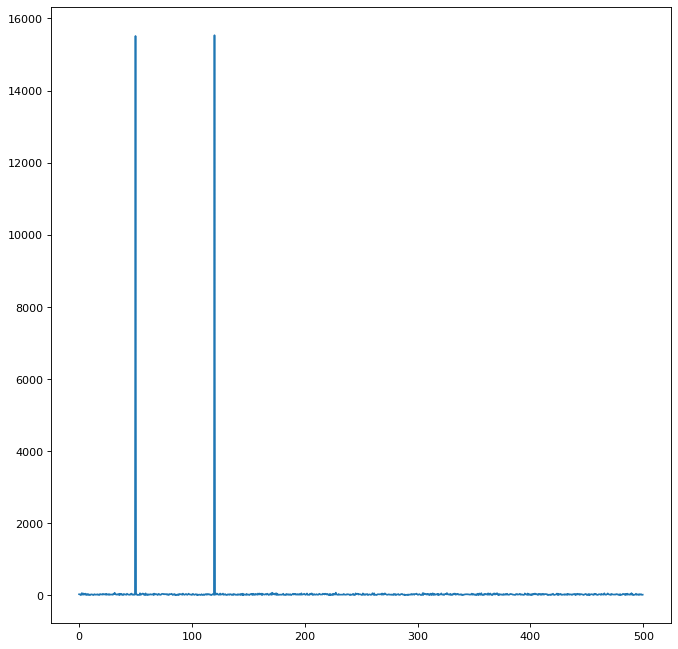

NUMBER OF SAMPLES IN NORMALIZED TONE:
88200
THE NOISY SIGNAL:


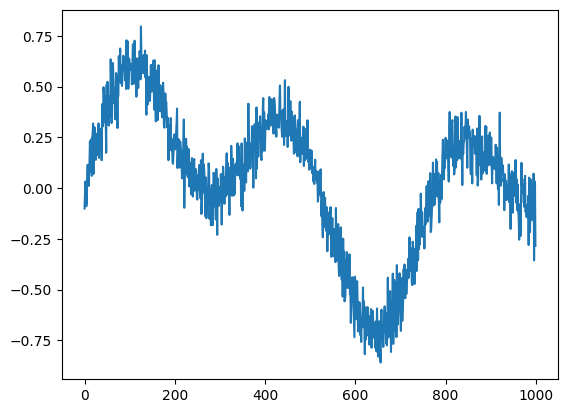

THE CLEANED SIGNAL:


c:\Users\difar\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


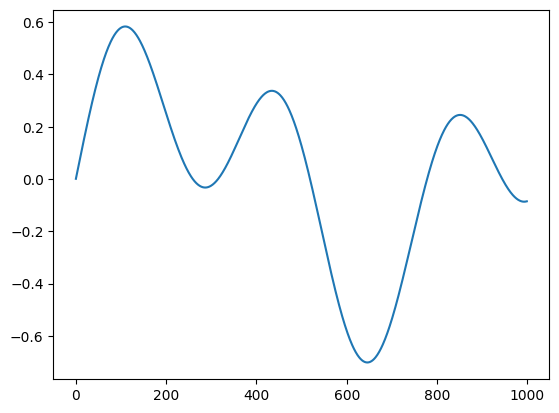

C:\Users\difar\AppData\Local\Temp\ipykernel_9944\301945085.py:75: ComplexWarning: Casting complex values to real discards the imaginary part
  write("cleaned_signal.wav", sample_rate, new_sig.astype(np.float32))


In [69]:
"""
To complete Task (i) you need to complete the following steps:
    - Apply fourier transformation to the noisy signal
    - Visualize the power spectrums
    - Normalized the samples
    - Removing noise from the signal

"""

###################################
#  Apply fourier transformation   #
#  INSERT YOUR CODE BE            #
###################################
#normalized_tone = np.int16((noisy_sig / noisy_sig.max()) * 32767)



fourier = fft(noisy_sig)

###################################
# Plotting the power spectrums    #
#  INSERT YOUR CODE BELOW         #
###################################
print("POWER SPECTRUMS:")
num_sample = SAMPLE_RATE * DURATION
xf = fftfreq(num_sample, 1 / SAMPLE_RATE)
plt.figure(figsize=(10,10), dpi=80)
plt.plot(xf[:1000], np.abs(fourier)[:1000])
plt.show()

#########################################
# Number of samples in normalized_tone  #
#  INSERT YOUR CODE BELOW               #
#########################################
print("NUMBER OF SAMPLES IN NORMALIZED TONE:")
print(num_sample)

####################################
# Removing noise from the signal   #
#  INSERT YOUR CODE BELOW          #
####################################
# Tips: Consider the follwing:
#       - What is the target frequency of the clean signal?
#       - What frequency content should be removed?

fourier[np.abs(fourier) < 10000] = 0
new_sig = ifft(fourier)

#################################################
#   Comparison between clean and noisy signal   #
#   INSERT YOUR CODE BELOW                      #
#################################################
print("THE NOISY SIGNAL:")
plt.plot(noisy_sig[:1000])
plt.show()
print("THE CLEANED SIGNAL:")
plt.plot(new_sig[:1000])
plt.show()


"""
To complete Task (ii) by saving the noisy and clean signals as audio file.
"""

##############################################
#  Save the noisy signal as an audio signal  #
#   INSERT YOUR CODE BELOW                   #
##############################################
write("noisy_signal.wav", sample_rate, noisy_sig.astype(np.float32))

##############################################
#  Save the clean signal as an audio signal  #
#   INSERT YOUR CODE BELOW                   #
##############################################
write("cleaned_signal.wav", sample_rate, new_sig.astype(np.float32))


## Question 3.

You are going to use the ‘accelerometer.csv’ dataset for this task.


In [70]:
import pandas as pd

# Read the accelerometer csv file
df = pd.read_csv('accelerometer.csv')
df.head(10)

,wconfid,pctid,x,y,z
0,1,20,1.004,0.090,-0.125
1,1,20,1.004,-0.043,-0.125
2,1,20,0.969,0.090,-0.121
3,1,20,0.973,-0.012,-0.137
4,1,20,1.000,-0.016,-0.121
5,1,20,0.961,0.082,-0.121
6,1,20,0.973,-0.055,-0.109
7,1,20,1.000,0.012,-0.133
8,1,20,0.969,-0.102,-0.141
9,1,20,0.973,-0.059,-0.125


In [71]:
print("Unique values in wconfid and pctid columns")
print("------------------------------------------")
print("Weight Configuration ID:", df.wconfid.unique())
print("Rotation speeds:", df.pctid.unique())

Unique values in wconfid and pctid columns
------------------------------------------
Weight Configuration ID: [1 2 3]
Rotation speeds: [ 20  25  30  35  40  45  50  55  60  65  70  75  80  85  90  95 100]


### Data description

The accelerometer data contains vibrations measures of a cooling fan with weights on its blades which can be used for vibration analysis. 

There are 5 attributes in the dataset:

        wconfid, pctid, x, y and z.


<strong>wconfid:</strong> Weight Configuration ID (1 - 'red' - normal configuration; 2 - 'blue' - perpendicular configuration; 3 - 'green' - opposite configuration)

<strong>pctid:</strong> Cooler Fan RPM Speed Percentage ID (20 means 20%, and so on).

<strong>x:</strong> Accelerometer x value.

<strong>y:</strong> Accelerometer y value.

<strong>z:</strong> Accelerometer z value. 

Seventeen rotation speeds were set up, ranging from 20% to 100% of the cooler maximum speed at 5% intervals; for the three weight distribution configurations in the cooler's blades.

The vibration measurements were collected at a frequency of 20 ms for 1 min for each percentage, generating 3000 records per speed. Thus, 153,000 vibration records were collected from the simulation model.


For this task you only consider the pctid of 20%, 35%, 50%, 85% and 100% interval. 

<strong>Part A:</strong> Perform frequency analysis using FFT for each $x$, $y$ and $z$ signal with respect to the three wconfid ids and five pctid intervals.

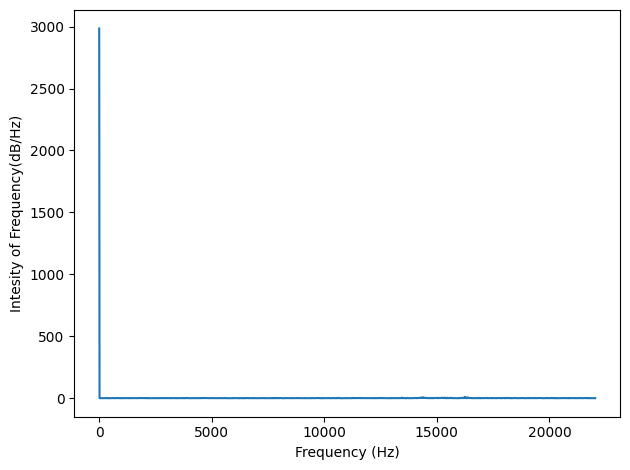

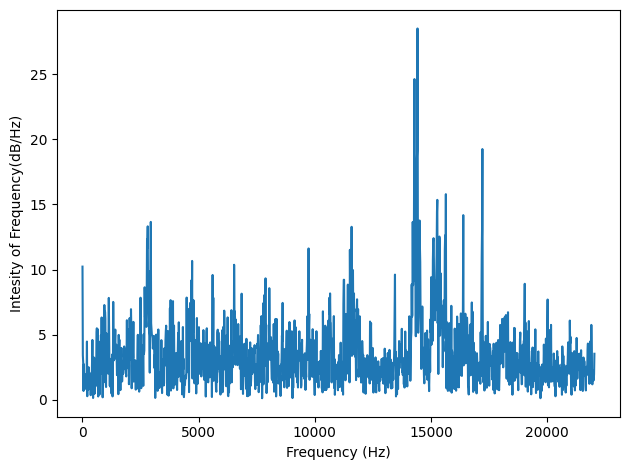

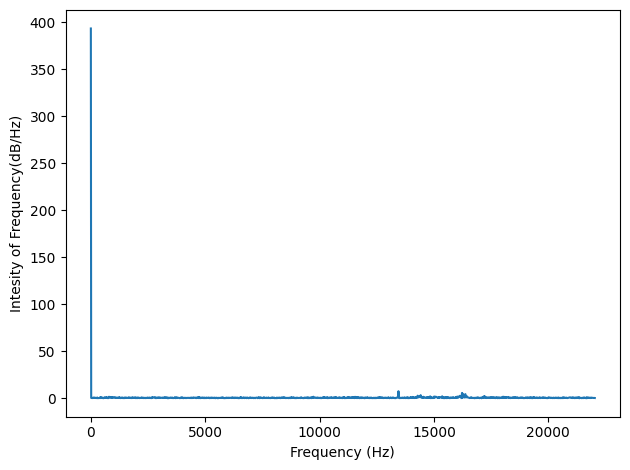

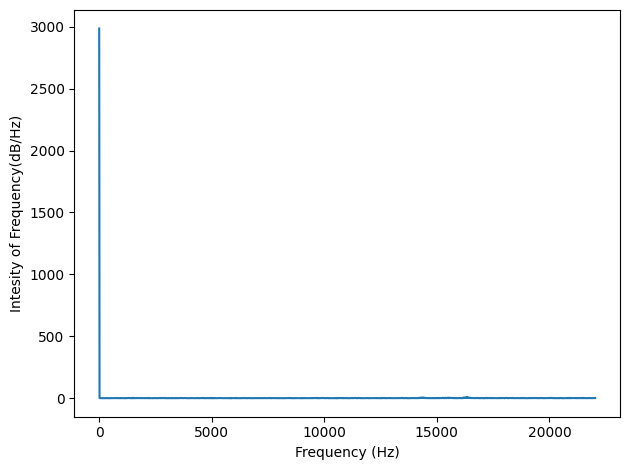

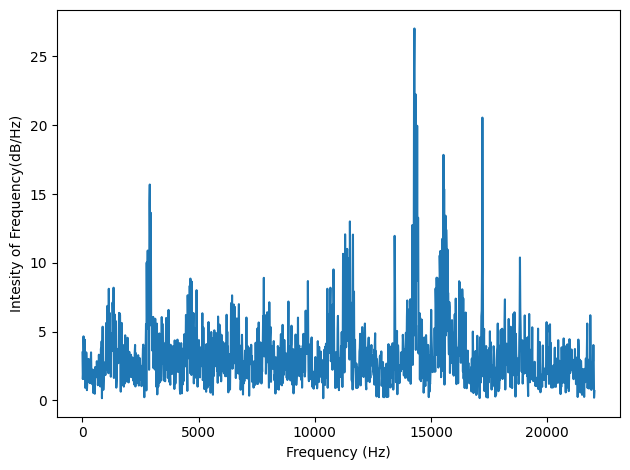

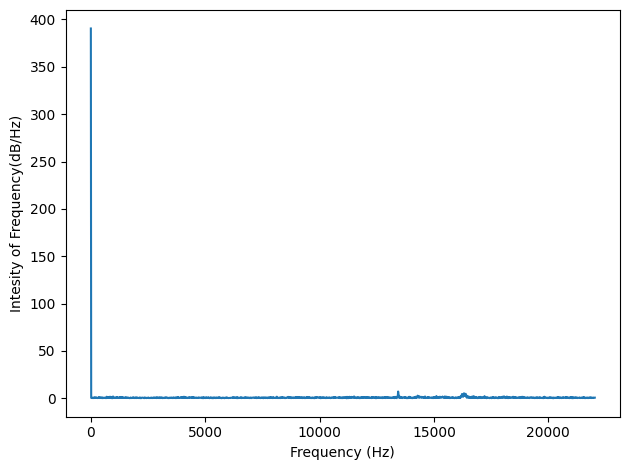

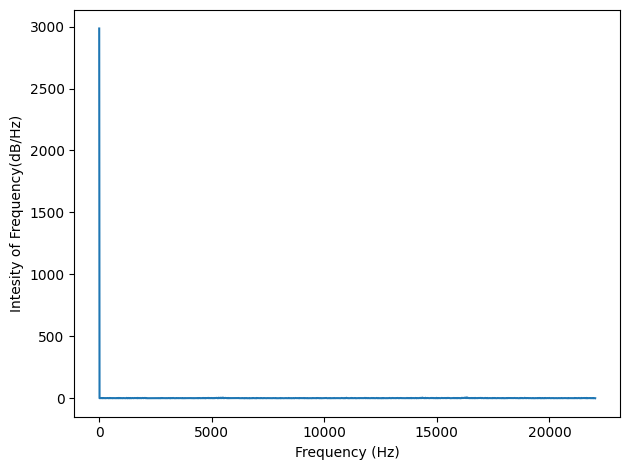

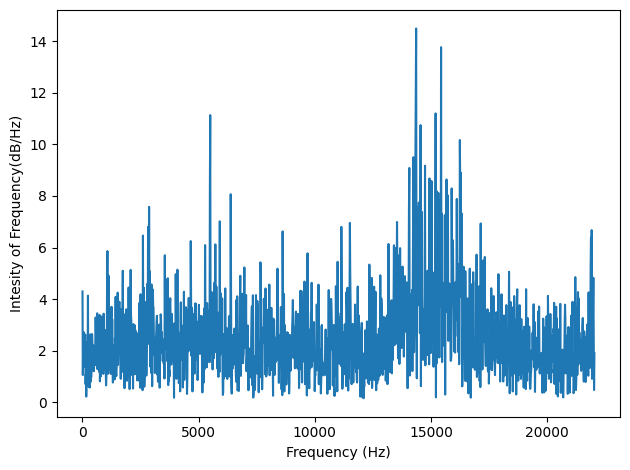

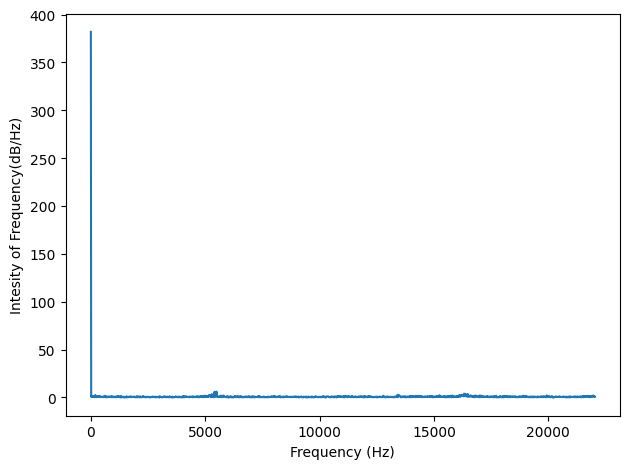

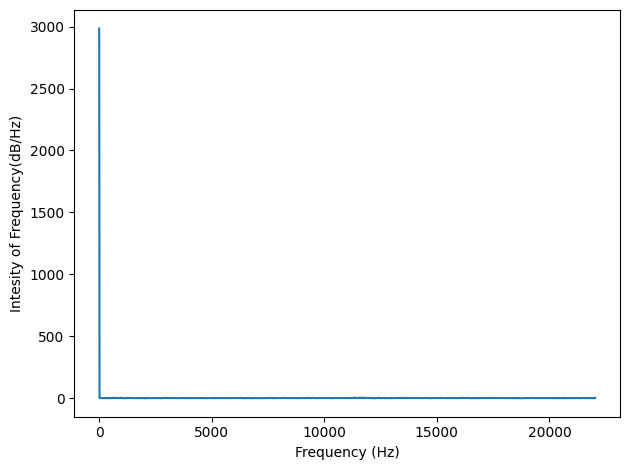

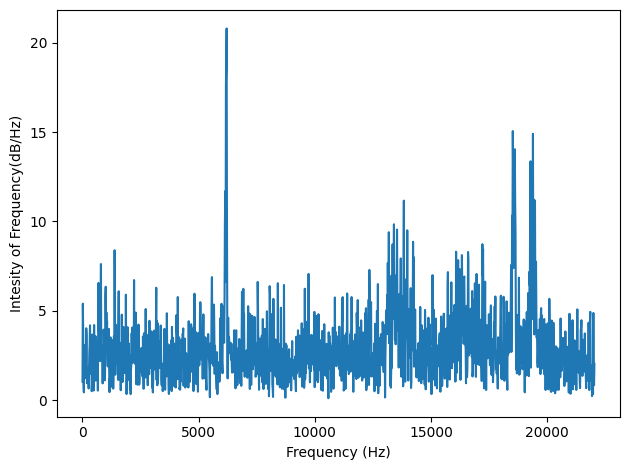

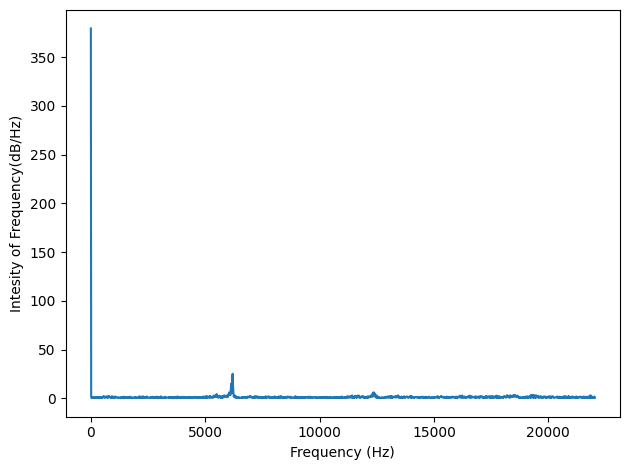

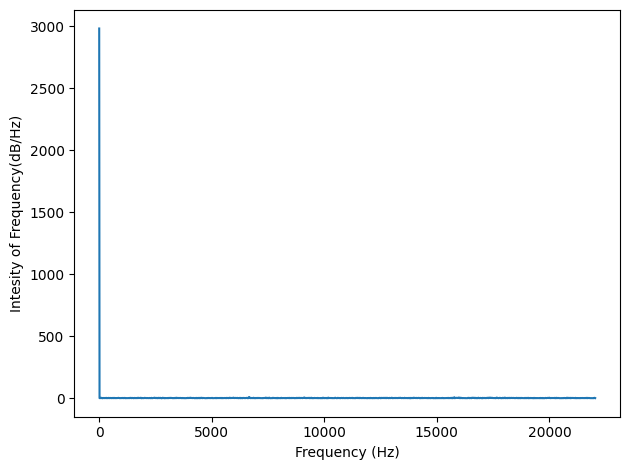

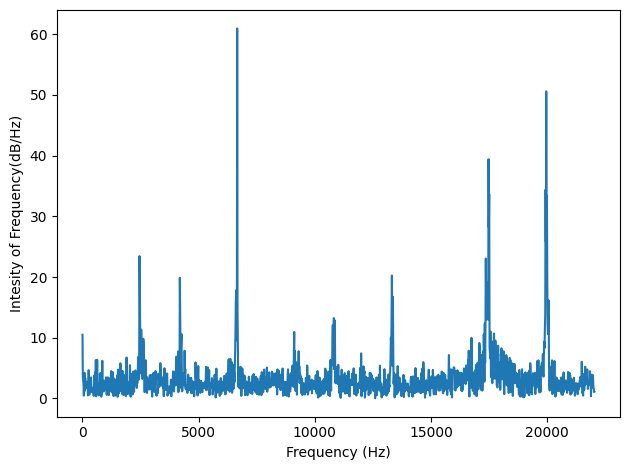

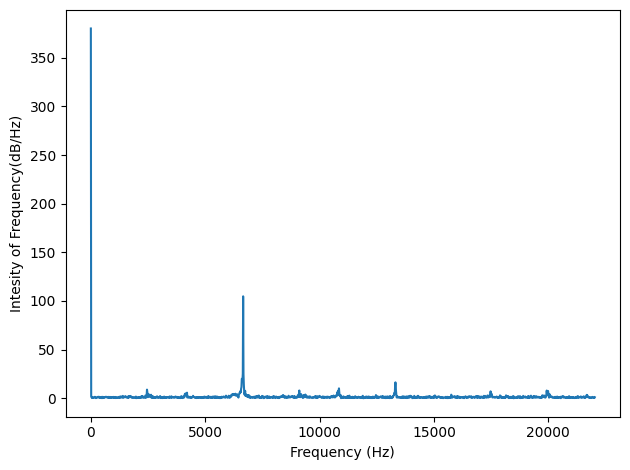

In [72]:
def frequencyAnalysis(signal):
    signal_fft = np.fft.fft(signal)
    N = len(signal)
    amp = np.abs(signal_fft[:N//2])
    f = np.arange(N//2) * (SAMPLE_RATE / N)
    return f, amp   
    


def plotFrequency(f, amp):
    plt.plot(f, amp)
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Intesity of Frequency(dB/Hz)')
    plt.tight_layout()
    plt.show()
    


#####################################################################
#  Call the functions for frequency analysis and plot the results   #
#  INSERT YOUR CODE BELOW                                           #
#####################################################################

####
# Tips: You need to sgement the signals according to the three wconfid ids and five pctid intervals.
#       You should plot spectral information of x, y and z signals in the same figure. 
#       There should be fifteen figures in a combination of three wconfid ids and five pctid intervals
####

wconfid_values = df.wconfid.unique()
pctid_values = df.pctid.unique()
i = 5

for wconfid in wconfid_values:
    for pctid in pctid_values:
        
        if i == 0:
            break
        data = df[(df.wconfid == wconfid) & (df.pctid == pctid)]
        x_signal = data['x'].values
        y_signal = data['y'].values
        z_signal = data['z'].values
        x_f, x_amp = frequencyAnalysis(x_signal)
        y_f, y_amp = frequencyAnalysis(y_signal)
        z_f, z_amp = frequencyAnalysis(z_signal)
        plotFrequency(x_f, x_amp)
        plotFrequency(y_f, y_amp)
        plotFrequency(z_f, z_amp)
        i = i - 1
        

<strong>Part B:</strong> Extract fearures from each wconfid

     (1) Time domain features: RMS, Variance, Power

     (2) Frequency domain features: Mean of band power spectrum, Maximum of band power spectrum, Sum of total 
         band power, variance of band power
     (3) Compute the signal complexity, i.e., entropy


In [73]:
# Extract the Time domain features
def timeFeatures(signal):
    signal = signal.to_numpy().flatten()
    RMS = np.sqrt(np.mean(signal **2)) 
    Variance = np.var(signal)
    Power = np.mean(signal ** 2)
    return RMS, Variance, Power    
    


def ferquencyFeatures(signal):    
    freq_bands = [(0.5, 3), (3, 8), (8, 12), (12, 30), (30, 45)]
    total_psd = []

    f, psd = welch(signal, fs=100, nperseg=256)

    for freq_band in freq_bands:
        psd_band = psd[(f >= freq_band[0]) & (f <= freq_band[1])]
        total_psd.append(np.sum(psd_band))

    meanBP = np.mean(total_psd)
    maxBP = np.max(total_psd)
    sumBP = np.sum(total_psd)
    varBP = np.var(total_psd)
    return meanBP, maxBP, sumBP, varBP
    


def signalComplexity(signal):    
    freq_domain = np.abs(np.fft.fft(signal))
    entropy_value = en(freq_domain)
    return entropy_value
    



In [74]:
##############################################
#  Call the functions and store a dataframe   #
#  INSERT YOUR CODE                          #
##############################################       

########
# Tips: You need to sgement the signals according to the three wconfid ids and five pctid intervals.
#       You should the same approach as you did for the Part A of Question 3
###################

feature_df = pd.DataFrame(columns=['signal', 'wconfid', 'pctid', 'RMS', 'Variance', 'Power', 'meanBP', 'maxBP', 'sumBP', 'varBP', 'entropy'])
wconfid_values = [1, 2, 3]
pctid_intervals = [(0, 20), (20, 35), (35, 50), (50, 85), (85, 100)]

for wconfid in wconfid_values:
    for p_start, p_end in pctid_intervals:
        
        segment = df[(df['wconfid'] == wconfid) & (df['pctid'] >= p_start) & (df['pctid'] < p_end)]
        i = i - 1
        
        for signal in ['x', 'y', 'z']:
            seg_signal = segment[signal]
            
            if seg_signal.empty:
                continue
                    
            RMS, Variance, Power = timeFeatures(seg_signal)
            meanBP, maxBP, sumBP, varBP = ferquencyFeatures(seg_signal)
            entropy = signalComplexity(seg_signal)
            #For some reason append doesnt seem to work in Visual Studio Code only in jupyter notebook
            feature_df = feature_df.append({
                'signal': signal,
                'wconfid': wconfid,
                'pctid': p_end,
                'RMS': RMS,
                'Variance': Variance,
                'Power': Power,
                'meanBP': meanBP,
                'maxBP': maxBP,
                'sumBP': sumBP,
                'varBP': varBP,
                'entropy': entropy
            }, ignore_index=True)
            

print(feature_df)

AttributeError: 'DataFrame' object has no attribute 'append'

## Question 4.
A sample digit dataset is loaded from the scikit-learn library. Data description is available at: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html

In [ ]:
# Load digits dataset from scikit-learn library
from sklearn.datasets import load_digits

digits = load_digits()

# Print the description of the dataset
print(digits.DESCR)


.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

The data consists of 8×8 pixel images, meaning that they are 64-dimensional. To gain some intuition into the relationships between these points, we can use PCA to project them to a more manageable number of dimensions, say two.

The digits dataset contains:
   - data         : The flattened data matrix. If as_frame=True, data will be a pandas DataFrame.
   - target       : The classification target. If as_frame=True, target will be a pandas Series.
   - feature_names: The names of the dataset columns.
   - target_names : The names of target classes.
   - images       : The raw image data. It is a ndarray of shape (1797, 8, 8)


<strong>Part A:</strong> Find the principal components and visualize them.

In [ ]:
# You need to extarct actual data, i.e., features from the dataset to apply PCA.
# Tips: You can use pandas dataframe

#########################################
#  Extract data from the digits dataset #
#  INSERT YOUR CODE BELOW               #
#########################################
data = digits.data
print(data)



[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


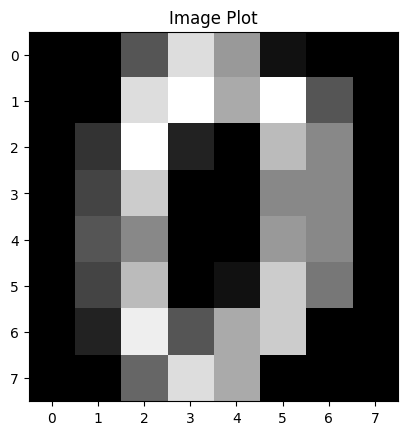

In [ ]:
###########################################  
#  Function to plot a single digit image  # 
#  INSERT YOUR CODE BELOW                 #
###########################################

def plot_image(imgData):
    ###
    #   description:  
    #       this function generates a plot for the given image.
    #  
    #   input parameters: 
    #       imgData (array_like): the image data .
    #
    ### 

    ###
    #  INSERT YOUR CODE TO PLOT A IMAGE.
    ###    
    # Tips: If you want to use the flatten data then you need reshape the data into 8*8 array
    
    imgData = imgData.reshape((8, 8))
    fig, ax = plt.subplots()
    ax.imshow(imgData, cmap='gray')
    ax.set_title('Image Plot')
    plt.show()
    

plot_image(data[0])
    

In [ ]:
# Some issues that need to consider before applying PCA
#   - Do we have to preprocess the data?
#   - Number of components to investigate
#   - How to choose the most important components?

###############################
#  Now apply PCA to the data  # 
#  INSERT YOUR CODE BELOW     #
###############################

data_scaled = StandardScaler().fit_transform(data)
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)



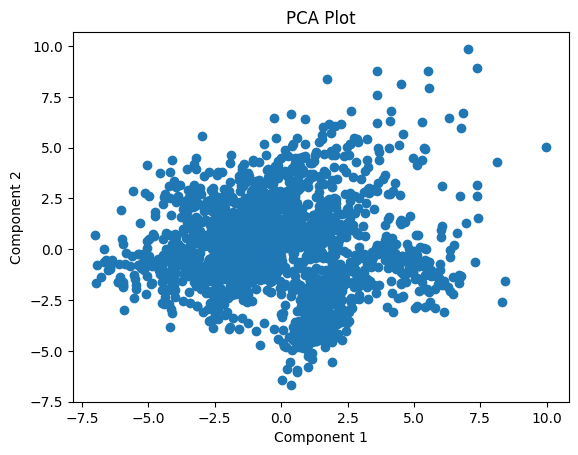

In [ ]:
# PCA components can be high dimensional in size. How ever we can only polt either 2D or 3D plot.
# Hence it is interesting to look at most important 2 or 3 components.
# You can either generate 2D or 3D plot for the PCA data 

def visualizePCA(data):
    ###
    #   description:  
    #       this function generates a plot for the given data.
    #  
    #   input parameters: 
    #       data (array_like): PCA components (either 2 or 3 components depends on 2D or 3D plot).
    #
    ### 

    ###
    #  INSERT YOUR CODE TO PLOT THE PCA COMPONENTS.
    ###
     
    # Create a 2D scatter plot
    plt.scatter(data[:, 0], data[:, 1])
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.title('PCA Plot')
    plt.show()

#############################
#  PCA Data Visualization   #
#############################
pca_components = data_pca[:, :2]
visualizePCA(pca_components)


<strong>Part B:</strong> Add some random noise to the data and clean it again using PCA.

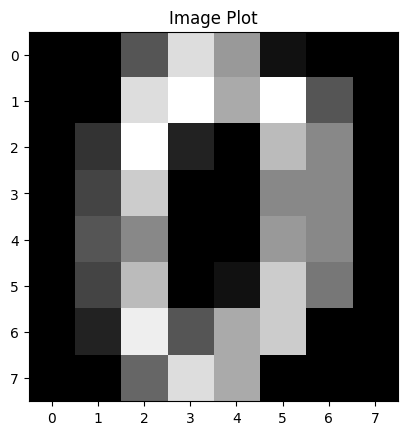

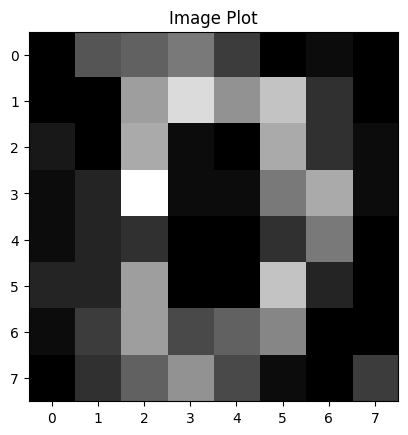

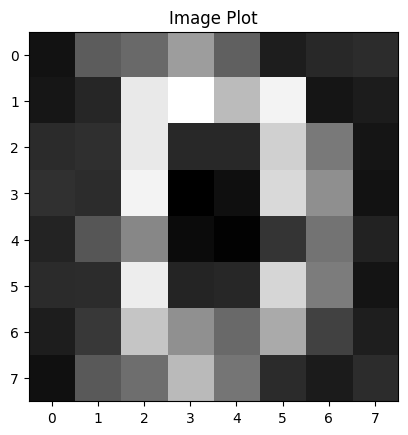

In [ ]:
# PCA is one of the tools to clean noisy data. 
# We will first add some random noise to the data to demonstrate how to clean noisy data using PCA.


###########################################
#  Call function to plot a orignal Image  #
#  INSERT YOUR CODE BELOW                 #
###########################################
plot_image(data[0])



############################
#  ADD NOISE TO THE DATE   #
#  INSERT YOUR CODE BELOW  #
############################
def add_noise_to_data(data):
    ###
    #   description:  
    #       this function takes data of a signle image and add random noise to it.
    #  
    #   input parameters: 
    #       data (array_like): Flatten data of digits dataset.
    #   output parameter:
    #      noise_data (array_like): Flatten data after adding random noise to the orignal data.
    #
    ### 

    ###
    #  INSERT YOUR CODE.
    ###   
    noise_std = 3
    noisy_data = np.clip(data + np.random.normal(scale=noise_std, size=data.shape), 0, 255).astype(np.uint8)
    return noisy_data


################################################
#  Call the function to add noise to the data  #
#  INSERT YOUR CODE BELOW                      #
################################################
noisy_data = add_noise_to_data(data[0])



############################################
#  Call function to plot the noisy image   #
#  INSERT YOUR CODE BELOW                  #
############################################
plot_image(noisy_data)


###################################
#  Clean the noisy data using PCA #
#  INSERT YOUR CODE BELOW         #
###################################
pca = PCA(n_components=2)
noisy_data = noisy_data.reshape((8, 8))
pca.fit(noisy_data)
denoised_imgData = pca.inverse_transform(pca.transform(noisy_data))

# Generate a plot of the denoised image


##############################################
#  Call function to plot the filtered image  #
#  INSERT YOUR CODE BELOW                    #
##############################################
plot_image(denoised_imgData)



## Question 5.
We will consider the sample time-series data 'sampletimeseries.csv' which contains flight information in a particular zone in 2014.

In [ ]:
import pandas as pd

# Import as Dataframe
df = pd.read_csv('sampletimeseries.csv')
df.head(10)

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,2014,1,1,1.0,96.0,235.0,70.0,AS,N508AS,145,PDX,ANC,194.0,1542,0.0,1.0
1,2014,1,1,4.0,-6.0,738.0,-23.0,US,N195UW,1830,SEA,CLT,252.0,2279,0.0,4.0
2,2014,1,1,8.0,13.0,548.0,-4.0,UA,N37422,1609,PDX,IAH,201.0,1825,0.0,8.0
3,2014,1,1,28.0,-2.0,800.0,-23.0,US,N547UW,466,PDX,CLT,251.0,2282,0.0,28.0
4,2014,1,1,34.0,44.0,325.0,43.0,AS,N762AS,121,SEA,ANC,201.0,1448,0.0,34.0
5,2014,1,1,37.0,82.0,747.0,88.0,DL,N806DN,1823,SEA,DTW,224.0,1927,0.0,37.0
6,2014,1,1,346.0,227.0,936.0,219.0,UA,N14219,1481,SEA,ORD,202.0,1721,3.0,46.0
7,2014,1,1,526.0,-4.0,1148.0,15.0,UA,N813UA,229,PDX,IAH,217.0,1825,5.0,26.0
8,2014,1,1,527.0,7.0,917.0,24.0,UA,N75433,1576,SEA,DEN,136.0,1024,5.0,27.0
9,2014,1,1,536.0,1.0,1334.0,-6.0,UA,N574UA,478,SEA,EWR,268.0,2402,5.0,36.0


### Now for the dataset, answer the following questions:

<strong>Part A:</strong> Find the general statistics and information of the data such as number of rows, columns, data types etc.

In [ ]:
# To better understand the data we cal look at some prilimiary statistcis.

################################################
#  Print the summary statistics of the dataset #    
#  INSERT YOUR CODE BELOW                      #
################################################
print(df.describe())




           year          month            day       dep_time      dep_delay   
count  162049.0  162049.000000  162049.000000  161192.000000  161192.000000  \
mean     2014.0       6.605027      15.749890    1278.283755       6.133859   
std         0.0       3.324399       8.789417     522.583793      29.112035   
min      2014.0       1.000000       1.000000       1.000000     -37.000000   
25%      2014.0       4.000000       8.000000     831.000000      -5.000000   
50%      2014.0       7.000000      16.000000    1217.000000      -2.000000   
75%      2014.0       9.000000      23.000000    1721.000000       5.000000   
max      2014.0      12.000000      31.000000    2400.000000    1553.000000   

            arr_time      arr_delay         flight       air_time   
count  161061.000000  160748.000000  162049.000000  160748.000000  \
mean     1482.501282       2.240868    1357.356725     152.588511   
std       523.958781      31.191037    1495.271031      72.547469   
min         

In [ ]:
# The result of the previous cell shows the default percentiles, i.e., 25%, 50%, 75%
# You can also customize the percentiles to get different view of the data 

#######################################################################
#  Print the summary statistics with the 10%, 30, and 70% percentiles #
#  INSERT YOUR CODE BELOW                                             #
#######################################################################
df.describe(percentiles=[0.1, 0.3, 0.7])



,year,month,day,dep_time,dep_delay,arr_time,arr_delay,flight,air_time,distance,hour,minute
count,162049.0,162049.000000,162049.000000,161192.000000,161192.000000,161061.000000,160748.000000,162049.000000,160748.000000,162049.000000,161192.000000,161192.000000
mean,2014.0,6.605027,15.749890,1278.283755,6.133859,1482.501282,2.240868,1357.356725,152.588511,1204.514634,12.479515,30.332244
std,0.0,3.324399,8.789417,522.583793,29.112035,523.958781,31.191037,1495.271031,72.547469,653.150062,5.232476,18.061569
min,2014.0,1.000000,1.000000,1.000000,-37.000000,1.000000,-67.000000,2.000000,18.000000,93.000000,0.000000,0.000000
10%,2014.0,2.000000,4.000000,636.000000,-7.000000,824.000000,-19.000000,127.000000,82.000000,550.000000,6.000000,5.000000
30%,2014.0,4.000000,10.000000,924.000000,-4.000000,1217.000000,-10.000000,482.000000,109.000000,784.000000,9.000000,18.000000
50%,2014.0,7.000000,16.000000,1217.000000,-2.000000,1517.000000,-4.000000,694.000000,129.000000,991.000000,12.000000,30.000000
70%,2014.0,9.000000,22.000000,1557.000000,2.000000,1820.000000,4.000000,1453.000000,189.000000,1448.000000,15.000000,44.000000
max,2014.0,12.000000,31.000000,2400.000000,1553.000000,2400.000000,1539.000000,6527.000000,422.000000,2724.000000,24.000000,59.000000


In [ ]:
# Pandas dataframe has some built-in functions that can come in handy for the initial investigation of the dataset.
# Print number of rows, columns, data types etc.

###############################################
#  Print the Number of samples in the dataset #    
###############################################
# Comoplete the CODE
num_rows = df.shape[0]
print('Number of rows:', num_rows)



######################################################
#  Print the Number of coloumns and the column names #    
######################################################
# Comoplete the CODE    
num_col = df.shape[1]
col_name = df.columns.tolist()
print('Number of columns:', num_col)
print('Columns are: \n',col_name)



##############################################
#  Print availble data types in the data set #    
##############################################
# Comoplete the CODE   
data_types = df.dtypes 
print('DATATYPES:\n',data_types)



Number of rows: 162049
Number of columns: 16
Columns are: 
 ['year', 'month', 'day', 'dep_time', 'dep_delay', 'arr_time', 'arr_delay', 'carrier', 'tailnum', 'flight', 'origin', 'dest', 'air_time', 'distance', 'hour', 'minute']
DATATYPES:
 year           int64
month          int64
day            int64
dep_time     float64
dep_delay    float64
arr_time     float64
arr_delay    float64
carrier       object
tailnum       object
flight         int64
origin        object
dest          object
air_time     float64
distance       int64
hour         float64
minute       float64
dtype: object


<strong>Part B:</strong> Consider any three columns and analyse them using plotting tools such as boxplot and histogram.

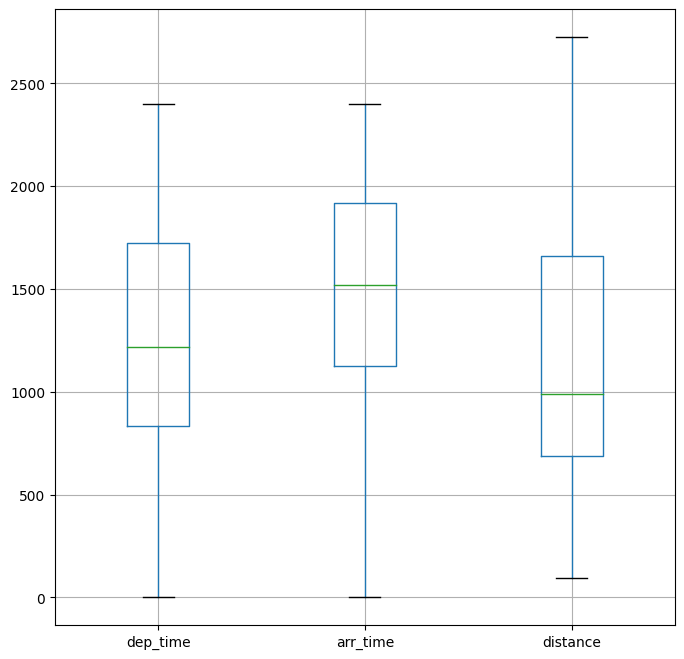

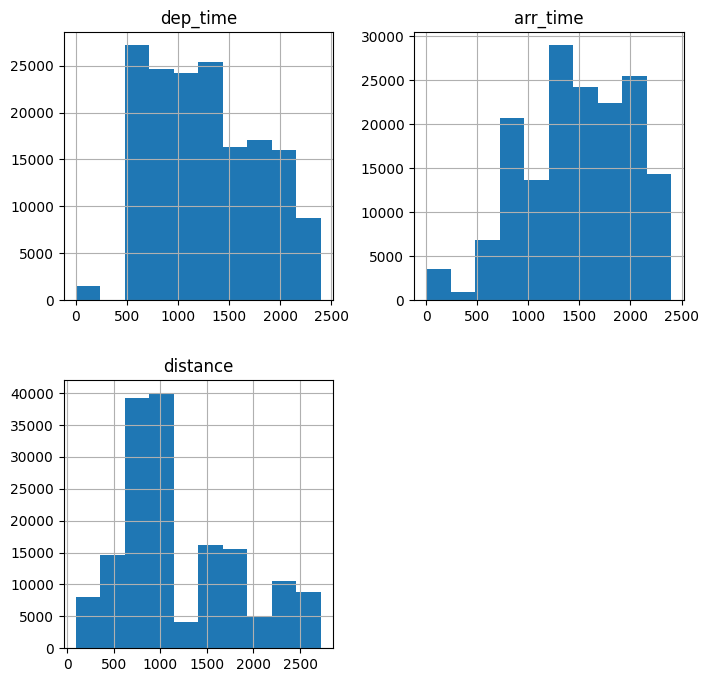

In [ ]:
# Two basic but important plotting tools are boxplot and histogram. 
# These two plots help not only to visualize data but to understand better the distribution of data. 
# Consider any three interesting columns to look at and better understand the data.


################################
#  Create boxplots for columns #
#  INSERT YOUR CODE BELOW.     #
################################
selected_cols = ['dep_time', 'arr_time', 'distance']
selected_data = df[selected_cols]
selected_data.boxplot(figsize=(8,8))
plt.show()



#################################
#  Create histogram for columns #
#  INSERT YOUR CODE BELOW.      #
#################################
selected_data.hist(figsize=(8,8))
plt.show()


<strong>Part C:</strong> Find all the missing values and use appropriate methods to fill the missing values.

In [ ]:
# Does the given dataset contain any missing values?
# Find the following two:
#     - which columns contain missing values
#     - percentage of missing values for each column


#############################
#  INSERT YOUR CODE BELOW.  #
#############################
missing_values = df.isnull().sum()


missing_percent = df.isnull().mean().round(5)* 100
print("percent of missing valuse per column:\n", missing_percent)


percent of missing valuse per column:
 year         0.000
month        0.000
day          0.000
dep_time     0.529
dep_delay    0.529
arr_time     0.610
arr_delay    0.803
carrier      0.000
tailnum      0.153
flight       0.000
origin       0.000
dest         0.000
air_time     0.803
distance     0.000
hour         0.529
minute       0.529
dtype: float64


In [ ]:
# Use appropriate method handle missing values.
# The things to think about: 
#    - what method to apply?
#    - Shall I remove the missing values?
#    - How much data will we lose if we remove missing values?
#    - Can we replace missing values with something else? How will that affect the analysis in future?

#############################
#  INSERT YOUR CODE BELOW.  #
#############################
df_cleaned_values = df.copy()
df_cleaned_values = df.dropna()
print(df_cleaned_values)




        year  month  day  dep_time  dep_delay  arr_time  arr_delay carrier   
0       2014      1    1       1.0       96.0     235.0       70.0      AS  \
1       2014      1    1       4.0       -6.0     738.0      -23.0      US   
2       2014      1    1       8.0       13.0     548.0       -4.0      UA   
3       2014      1    1      28.0       -2.0     800.0      -23.0      US   
4       2014      1    1      34.0       44.0     325.0       43.0      AS   
...      ...    ...  ...       ...        ...       ...        ...     ...   
162041  2014      9   30    2344.0       -1.0     527.0       -5.0      UA   
162042  2014      9   30    2347.0       -3.0     229.0       -2.0      AS   
162043  2014      9   30    2349.0       -1.0     514.0      -19.0      AS   
162044  2014      9   30    2357.0       -2.0     545.0      -20.0      UA   
162045  2014      9   30    2359.0        4.0     734.0       -1.0      DL   

       tailnum  flight origin dest  air_time  distance  hour  m

<strong>Part D:</strong> Convert the categorical values into numerical values using any appropriate methods.

In [ ]:
# The task is to change categorical values into neumerical ones to make flexible for any data analysis
# Consider the columuns in the dataframe that represents categorical values
# You should use appropriate method for the conversion.

#############################
#  INSERT YOUR CODE BELOW.  #   
#############################

num_df = df_cleaned_values.copy()
num_df['origin'] = LabelEncoder().fit_transform(num_df['origin'])
num_df['dest']  = LabelEncoder().fit_transform(num_df['dest'])
num_df['carrier']  = LabelEncoder().fit_transform(num_df['carrier'])
num_df['tailnum']  = LabelEncoder().fit_transform(num_df['tailnum'])
print(num_df)



        year  month  day  dep_time  dep_delay  arr_time  arr_delay  carrier   
0       2014      1    1       1.0       96.0     235.0       70.0        1  \
1       2014      1    1       4.0       -6.0     738.0      -23.0        8   
2       2014      1    1       8.0       13.0     548.0       -4.0        7   
3       2014      1    1      28.0       -2.0     800.0      -23.0        8   
4       2014      1    1      34.0       44.0     325.0       43.0        1   
...      ...    ...  ...       ...        ...       ...        ...      ...   
162041  2014      9   30    2344.0       -1.0     527.0       -5.0        7   
162042  2014      9   30    2347.0       -3.0     229.0       -2.0        1   
162043  2014      9   30    2349.0       -1.0     514.0      -19.0        1   
162044  2014      9   30    2357.0       -2.0     545.0      -20.0        7   
162045  2014      9   30    2359.0        4.0     734.0       -1.0        3   

        tailnum  flight  origin  dest  air_time  di

#### The assignment is completed, great work!!!